predict 2 things –
1) Average Cost for two(Cost for two people in different currencies )
2) Price range


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Try different encodings to read the file if one fails
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

for encoding in encodings:
    try:

        zomato_df = pd.read_csv(r'C:\Users\ONYINYE EKEOCHA\zomato.csv', encoding=encoding)
        print(f'Successfully read the file with encoding: {encoding}')
        print(zomato_df.head())
        break
    except UnicodeDecodeError:
        print(f'Failed to read the file with encoding: {encoding}')

Failed to read the file with encoding: utf-8
Successfully read the file with encoding: latin1
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Toky

In [4]:
zomato_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
#Loading the country_code dataset
country_df = pd.read_excel(r"C:\Users\ONYINYE EKEOCHA\Country-Code.xlsx")
country_df

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [6]:
# Merge the datasets based on the 'Country Code' column
combined_df = pd.merge(zomato_df, country_df, on='Country Code', how='left')
combined_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [7]:
combined_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [9]:
combined_df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


In [10]:
combined_df.shape

(9551, 22)

In [12]:
combined_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [13]:
combined_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

<Axes: >

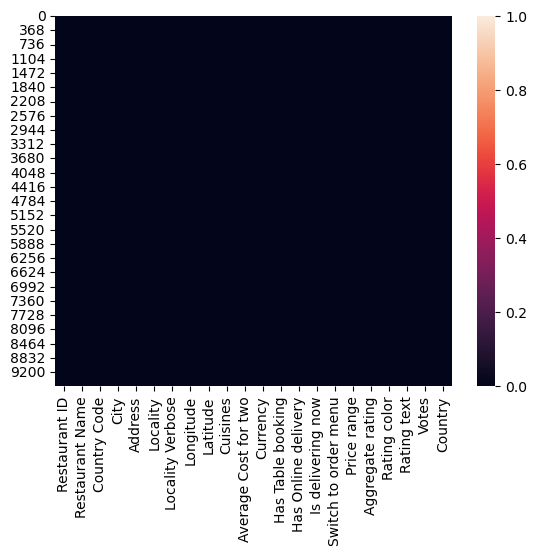

In [14]:
sns.heatmap(combined_df.isnull())

In [15]:
combined_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

There are no null values in the dataset

In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [17]:
#Checking for duplicated rows
print ("Total Duplicate rows are: ",combined_df.duplicated().sum())

Total Duplicate rows are:  0


In [18]:
#checking number of unique values in each column
combined_df.nunique().to_frame("No. of unique values")

,No. of unique values
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


These are the unique values present in the dataset, we need to remove unnecessary columns

In [19]:
#Dropping Unnecessary Columns
combined_df.drop("Restaurant ID",axis = 1, inplace = True)
combined_df.drop("Restaurant Name",axis = 1, inplace = True)
combined_df.drop("Address",axis = 1, inplace = True)
combined_df.drop("Longitude",axis = 1, inplace = True)
combined_df.drop("Latitude",axis = 1, inplace = True)

In [20]:
combined_df.describe()

,Country Code,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,1199.210763,1.804837,2.666370,156.909748
std,56.750546,16121.183073,0.905609,1.516378,430.169145
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,250.000000,1.000000,2.500000,5.000000
50%,1.000000,400.000000,2.000000,3.200000,31.000000
75%,1.000000,700.000000,2.000000,3.700000,131.000000
max,216.000000,800000.000000,4.000000,4.900000,10934.000000


From the statistical summary, We can observe the following

The counts of all columns are the same, 
there is no missing values in the dataset.
The median(50%) is less than the mean in most columns, this means that the data is skewed to the right.
There is a huge diference between 75% and max meaning there are outliers present in the dataset.
We can also notice the standard deviation,min and 25% percentile values

Univariate Analysis

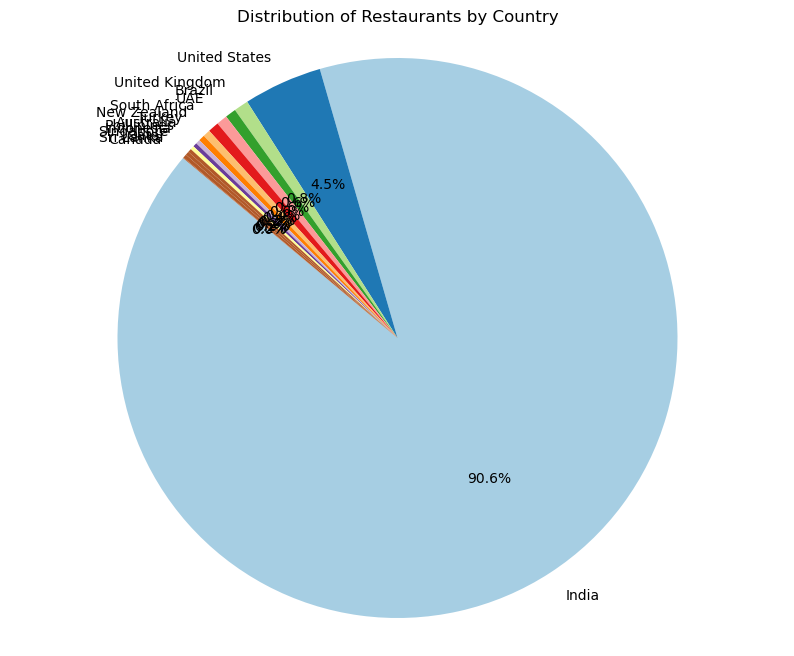

In [26]:
# Group by 'Country' to get the number of restaurants per country
country_counts = combined_df['Country'].value_counts()

# Prepare data for the pie chart
labels = country_counts.index
sizes = country_counts.values
colors = plt.cm.Paired(range(len(labels)))  # Optional: Generate a color palette

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Restaurants by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

From the analysis, we can see that India has the highest number of restaurants

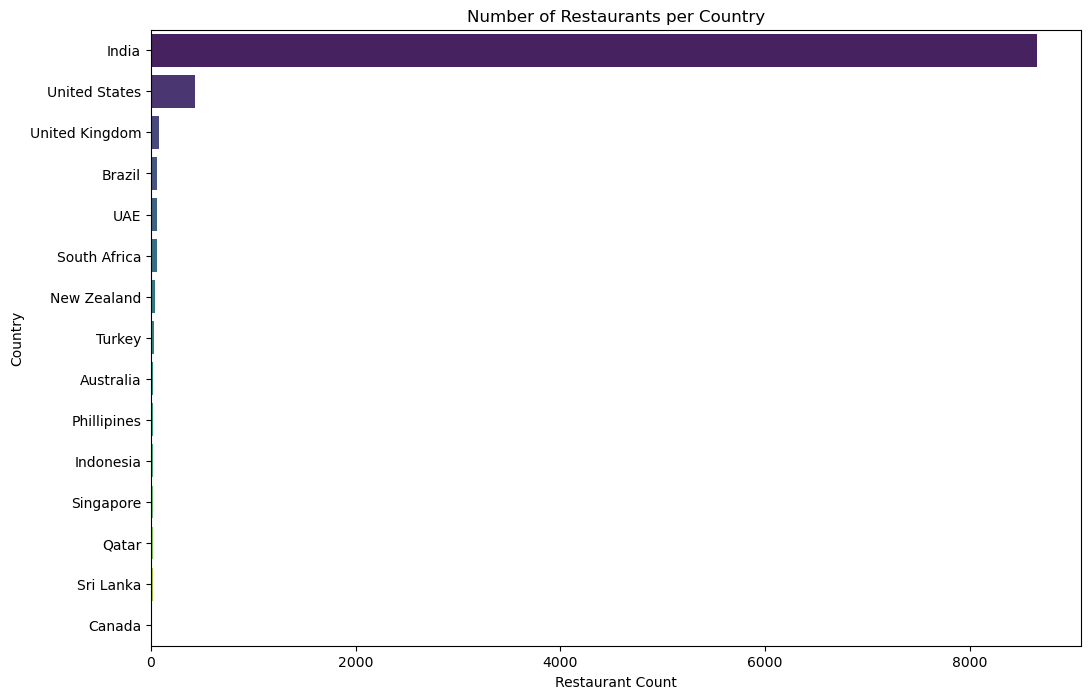

In [29]:
# Aggregate data: count the number of restaurants per country
country_counts = combined_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Restaurant Count']

# Create a bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Restaurant Count', y='Country', data=country_counts, palette='viridis')
plt.title('Number of Restaurants per Country')
plt.xlabel('Restaurant Count')
plt.ylabel('Country')
plt.show()

From the analysis, we can see that India has the highest number of restaurants

No     8393
Yes    1158
Name: Has Table booking, dtype: int64


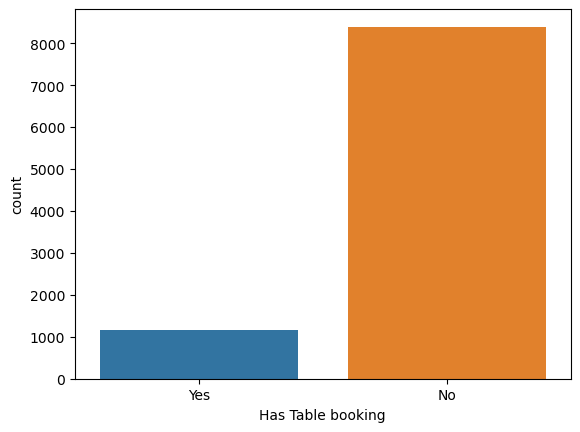

In [34]:
# Visualise the count of people that have Table booking
ax = sns.countplot(x="Has Table booking",data = combined_df)
print(combined_df['Has Table booking'].value_counts())

The dataset shows that fewer people have table booking

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64


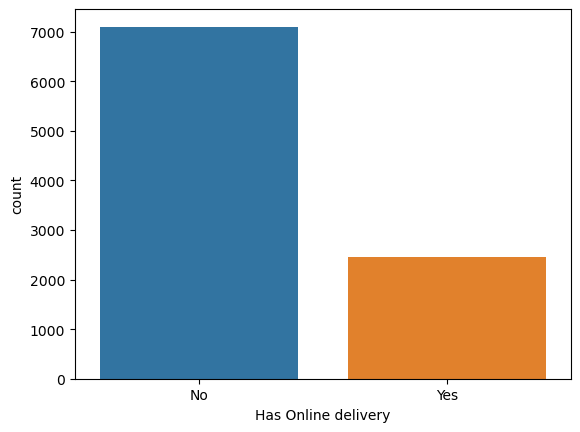

In [35]:
# Visualise the count of restaurants that have Online delivery
ax = sns.countplot(x="Has Online delivery",data = combined_df)
print(combined_df['Has Online delivery'].value_counts())

The dataset shows that fewer restaurants have Online delivery

No     9517
Yes      34
Name: Is delivering now, dtype: int64


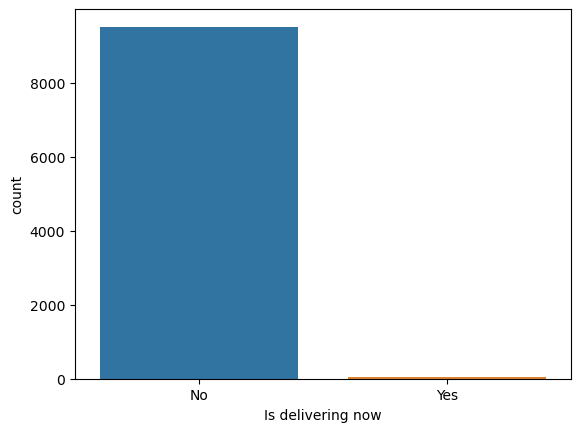

In [36]:
# Visualise the count of restaurants that Is delivering now
ax = sns.countplot(x="Is delivering now",data = combined_df)
print(combined_df['Is delivering now'].value_counts())

The dataset shows that fewer restaurants is delivering now

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64


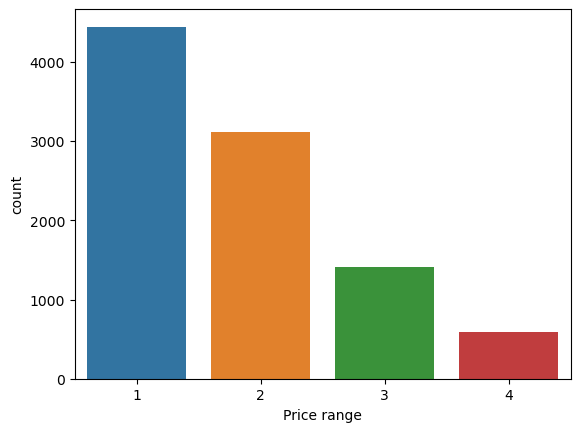

In [37]:
# Visualise the price range of restaurants
ax = sns.countplot(x="Price range",data = combined_df)
print(combined_df['Price range'].value_counts())

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64


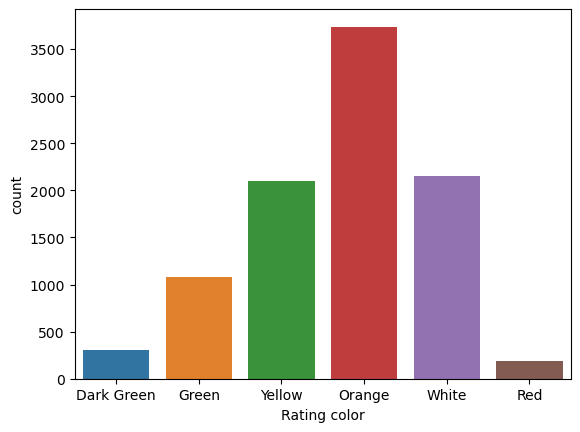

In [38]:
# Visualise the Rating color
ax = sns.countplot(x="Rating color",data = combined_df)
print(combined_df['Rating color'].value_counts())

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64


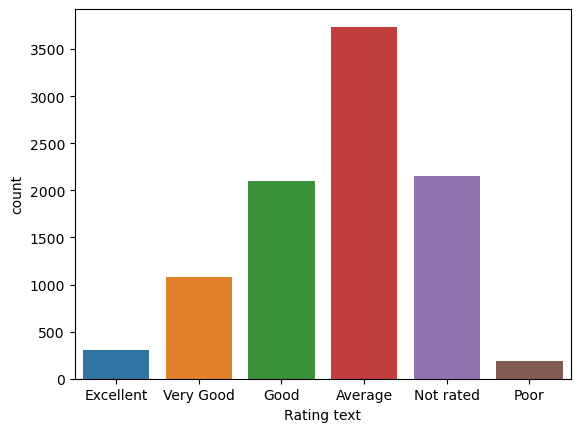

In [39]:
# Visualise the Rating text
ax = sns.countplot(x="Rating text",data = combined_df)
print(combined_df['Rating text'].value_counts())

Most of the restaurants are rated Average

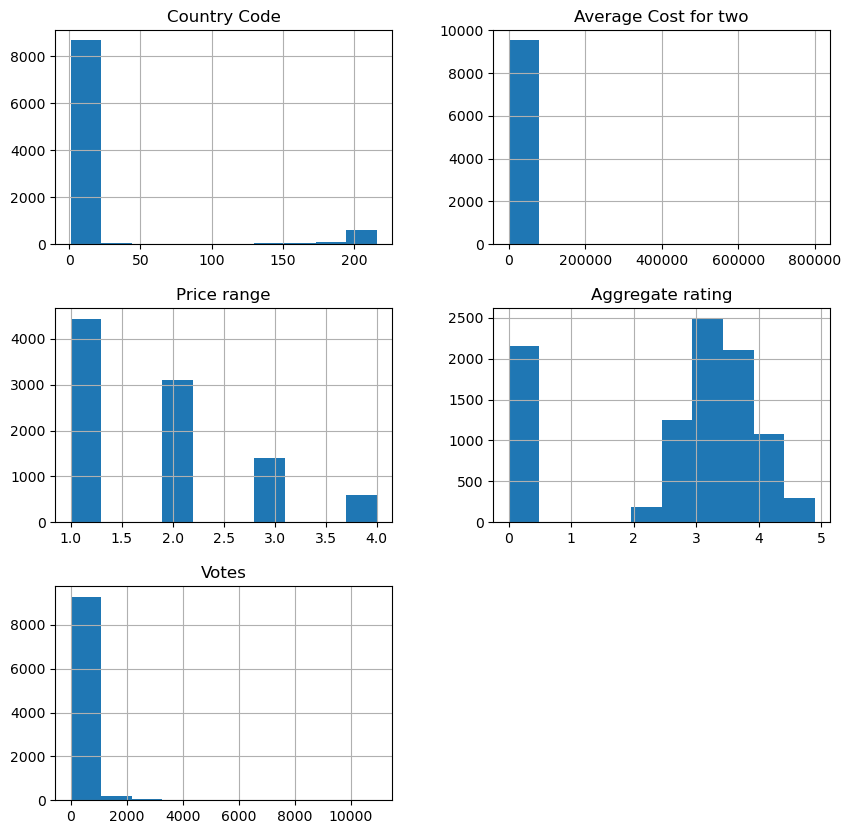

In [52]:
combined_df.hist(bins=10,figsize=(10,10));

Bivariate Analysis

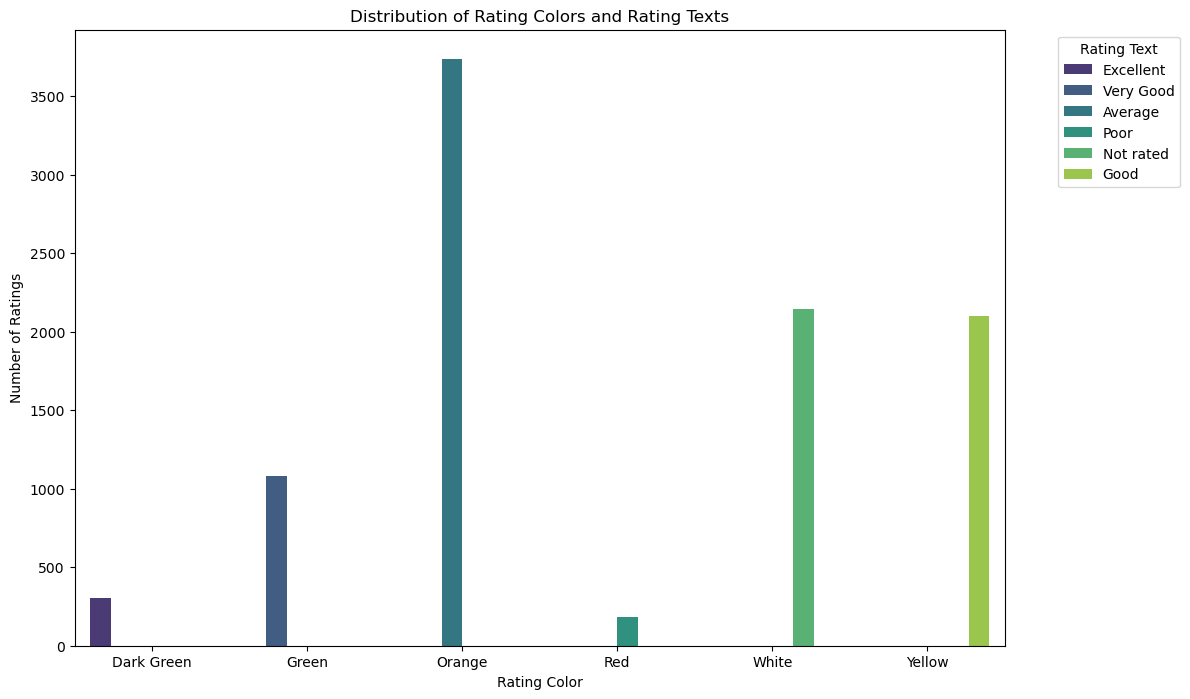

In [43]:
# Group by 'Rating color' and 'Rating text' and count the number of occurrences
rating_counts = combined_df.groupby(['Rating color', 'Rating text']).size().reset_index(name='Counts')

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=rating_counts, x='Rating color', y='Counts', hue='Rating text', palette='viridis')
plt.title('Distribution of Rating Colors and Rating Texts')
plt.xlabel('Rating Color')
plt.ylabel('Number of Ratings')
plt.legend(title='Rating Text', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Not rated count is very high,lets visualize what is cause

In [44]:
No_rating = combined_df[combined_df['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


India seems to have highest unrated restaurants

<Figure size 1400x1000 with 0 Axes>

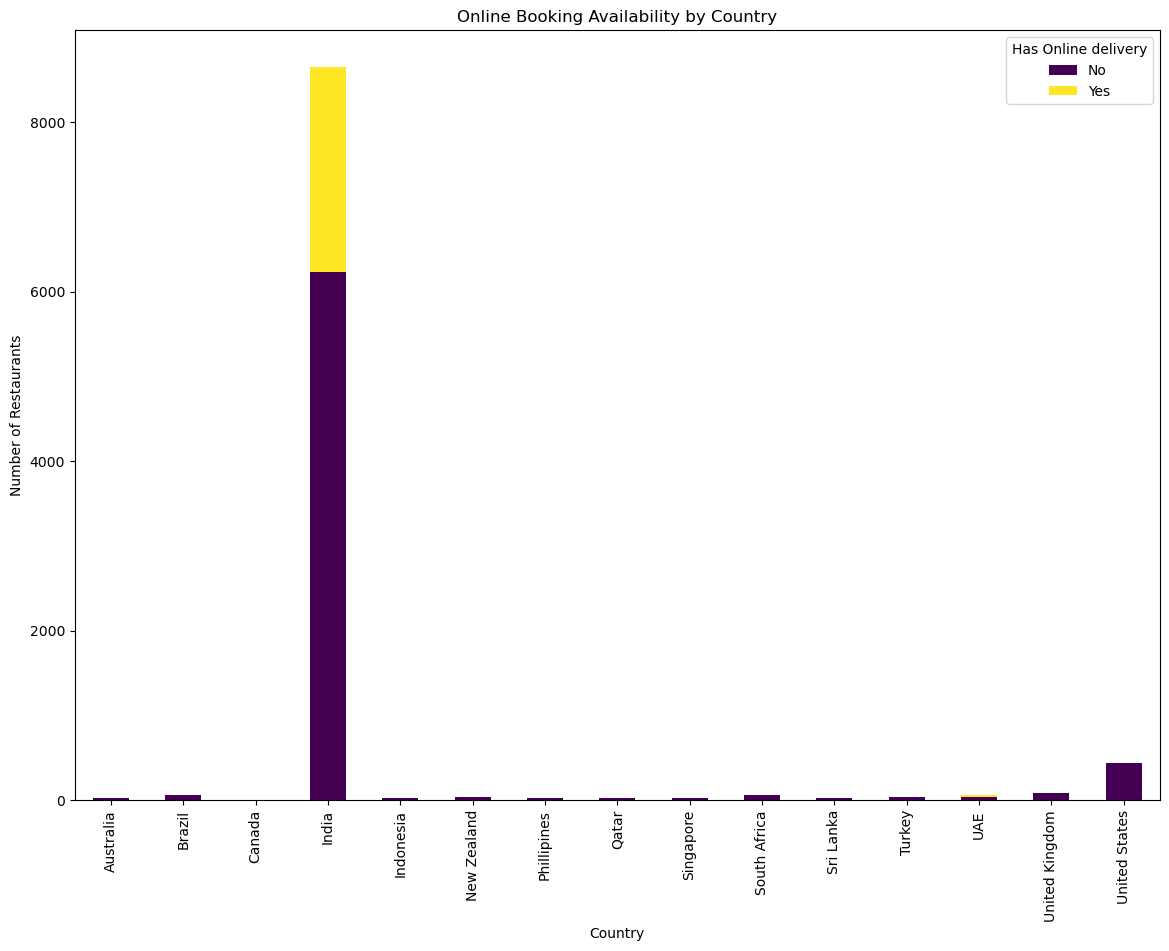

In [45]:
online_booking_counts = combined_df.groupby(['Country', 'Has Online delivery']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 10))
online_booking_counts.plot(kind='bar', stacked=True, figsize=(14, 10), colormap='viridis')

plt.title('Online Booking Availability by Country')
plt.xlabel('Country')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Has Online delivery', labels=['No', 'Yes'])
plt.show()

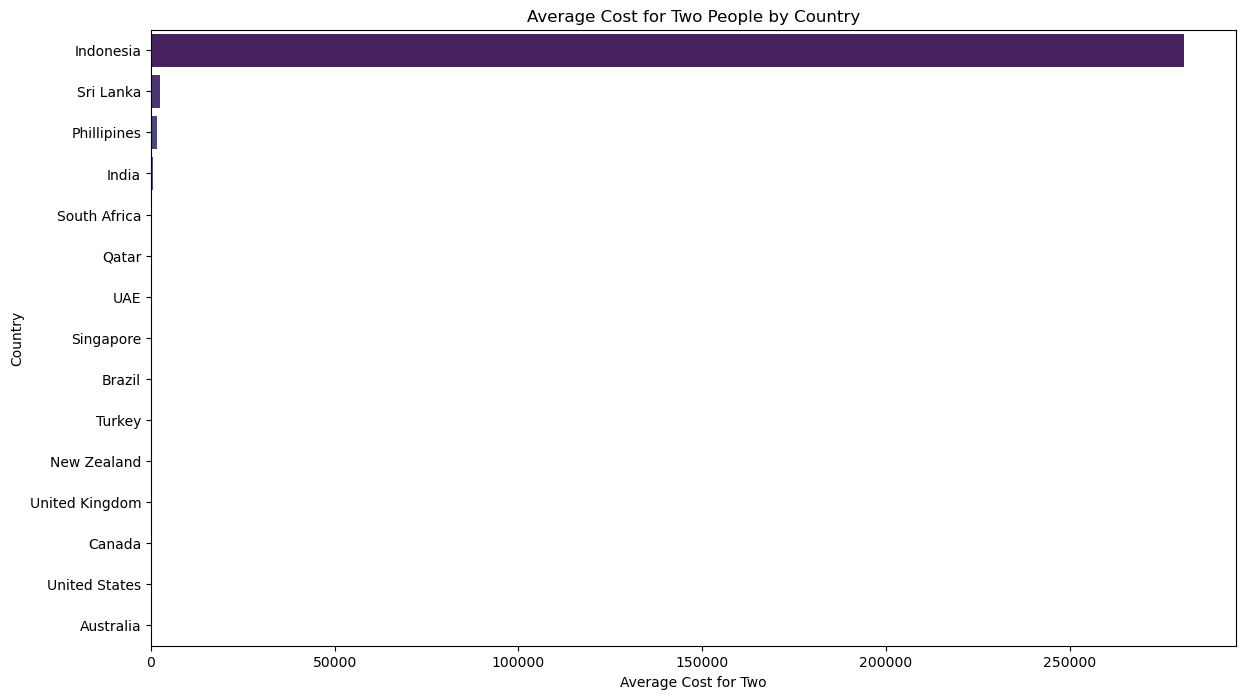

In [46]:
average_cost_by_country = combined_df.groupby('Country')['Average Cost for two'].mean().reset_index()

# Sort the data for better visualization
average_cost_by_country = average_cost_by_country.sort_values(by='Average Cost for two', ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Average Cost for two', y='Country', data=average_cost_by_country, palette='viridis')
plt.title('Average Cost for Two People by Country')
plt.xlabel('Average Cost for Two')
plt.ylabel('Country')
plt.show()

The average cost for 2 is highest in Indonesia

In [48]:
country_currency_df = combined_df[['Country', 'Currency']].drop_duplicates().sort_values(by='Country')

# Display the table of Country and Currency
print(country_currency_df)


             Country                Currency
102        Australia               Dollar($)
22            Brazil      Brazilian Real(R$)
185           Canada               Dollar($)
624            India      Indian Rupees(Rs.)
9276       Indonesia  Indonesian Rupiah(IDR)
9297     New Zealand           NewZealand($)
0        Phillipines        Botswana Pula(P)
9417           Qatar         Qatari Rial(QR)
456        Singapore               Dollar($)
9437    South Africa                 Rand(R)
9497       Sri Lanka   Sri Lankan Rupee(LKR)
9517          Turkey        Turkish Lira(TL)
564              UAE      Emirati Diram(AED)
9337  United Kingdom              Pounds(£)
82     United States               Dollar($)


Multivariate Analysis

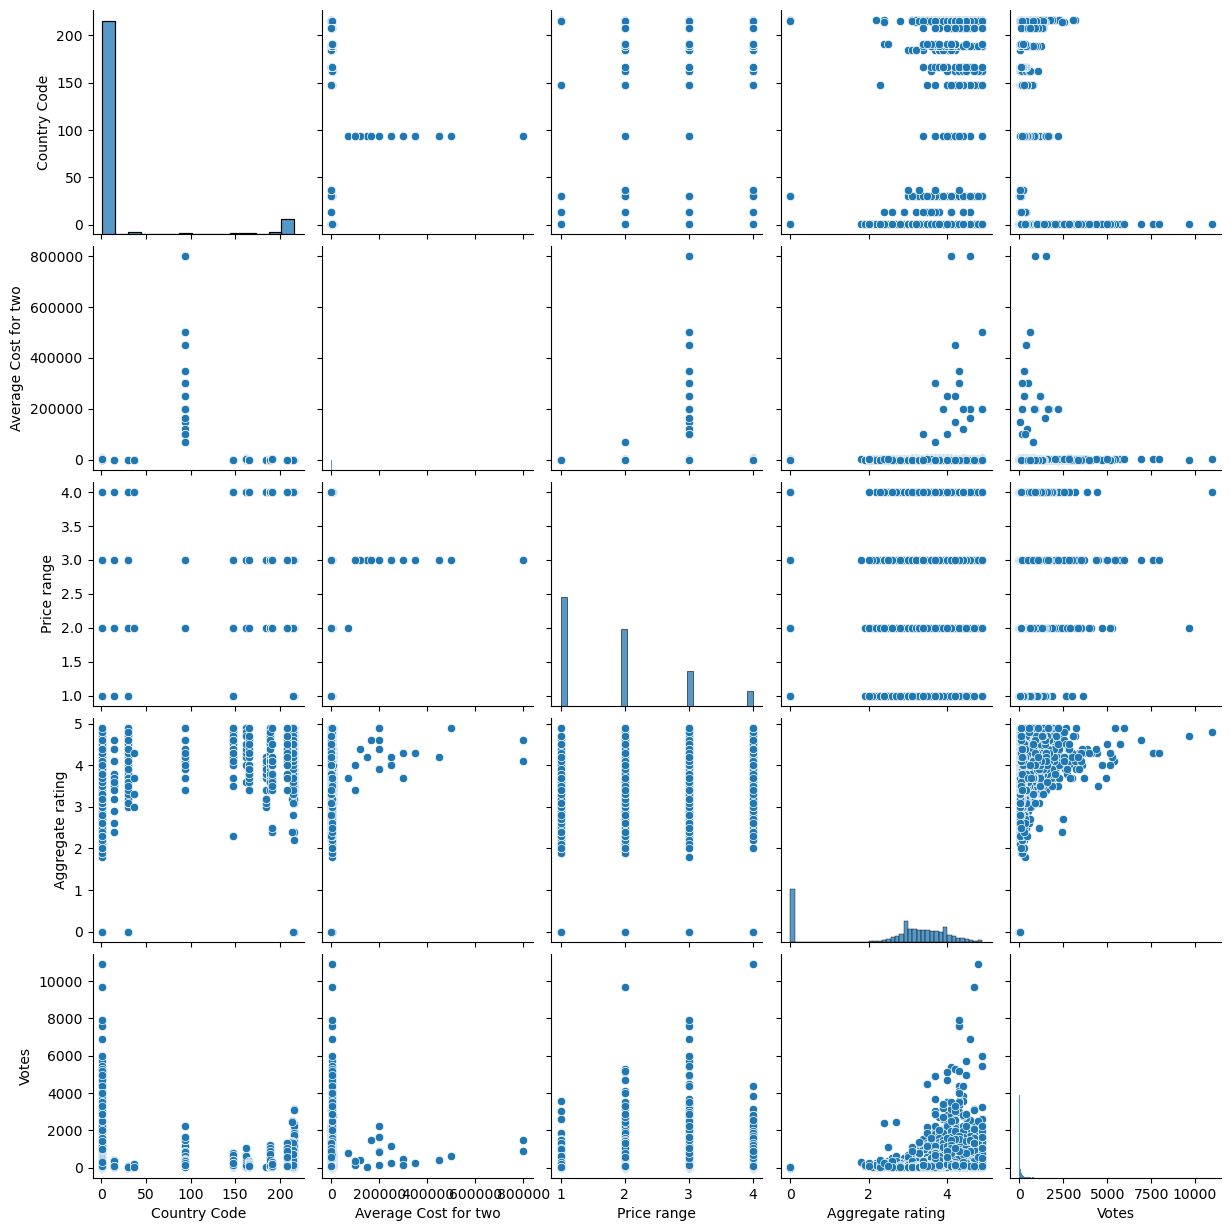

In [54]:
# Pairplot for pairwise relationships
sns.pairplot(combined_df)
plt.show()

In [55]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in combined_df.columns:
    if combined_df[i].dtypes =='object':
        combined_df[i] = OE.fit_transform(combined_df[i].values.reshape(-1,1))
combined_df

,Country Code,City,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,73.0,171.0,172.0,920.0,1100,0.0,1.0,0.0,0.0,0.0,3,4.8,0.0,1.0,314,6.0
1,162,73.0,593.0,601.0,1111.0,1200,0.0,1.0,0.0,0.0,0.0,3,4.5,0.0,1.0,591,6.0
2,162,75.0,308.0,314.0,1671.0,4000,0.0,1.0,0.0,0.0,0.0,4,4.4,1.0,5.0,270,6.0
3,162,75.0,862.0,875.0,1126.0,1500,0.0,0.0,0.0,0.0,0.0,4,4.9,0.0,1.0,365,6.0
4,162,75.0,862.0,875.0,1122.0,1500,0.0,1.0,0.0,0.0,0.0,4,4.8,0.0,1.0,229,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,140.0,517.0,523.0,1813.0,80,11.0,0.0,0.0,0.0,0.0,3,4.1,1.0,5.0,788,11.0
9547,208,140.0,552.0,558.0,1824.0,105,11.0,0.0,0.0,0.0,0.0,3,4.2,1.0,5.0,1034,11.0
9548,208,140.0,554.0,561.0,1110.0,170,11.0,0.0,0.0,0.0,0.0,4,3.7,5.0,2.0,661,11.0
9549,208,140.0,554.0,561.0,1657.0,120,11.0,0.0,0.0,0.0,0.0,4,4.0,1.0,5.0,901,11.0


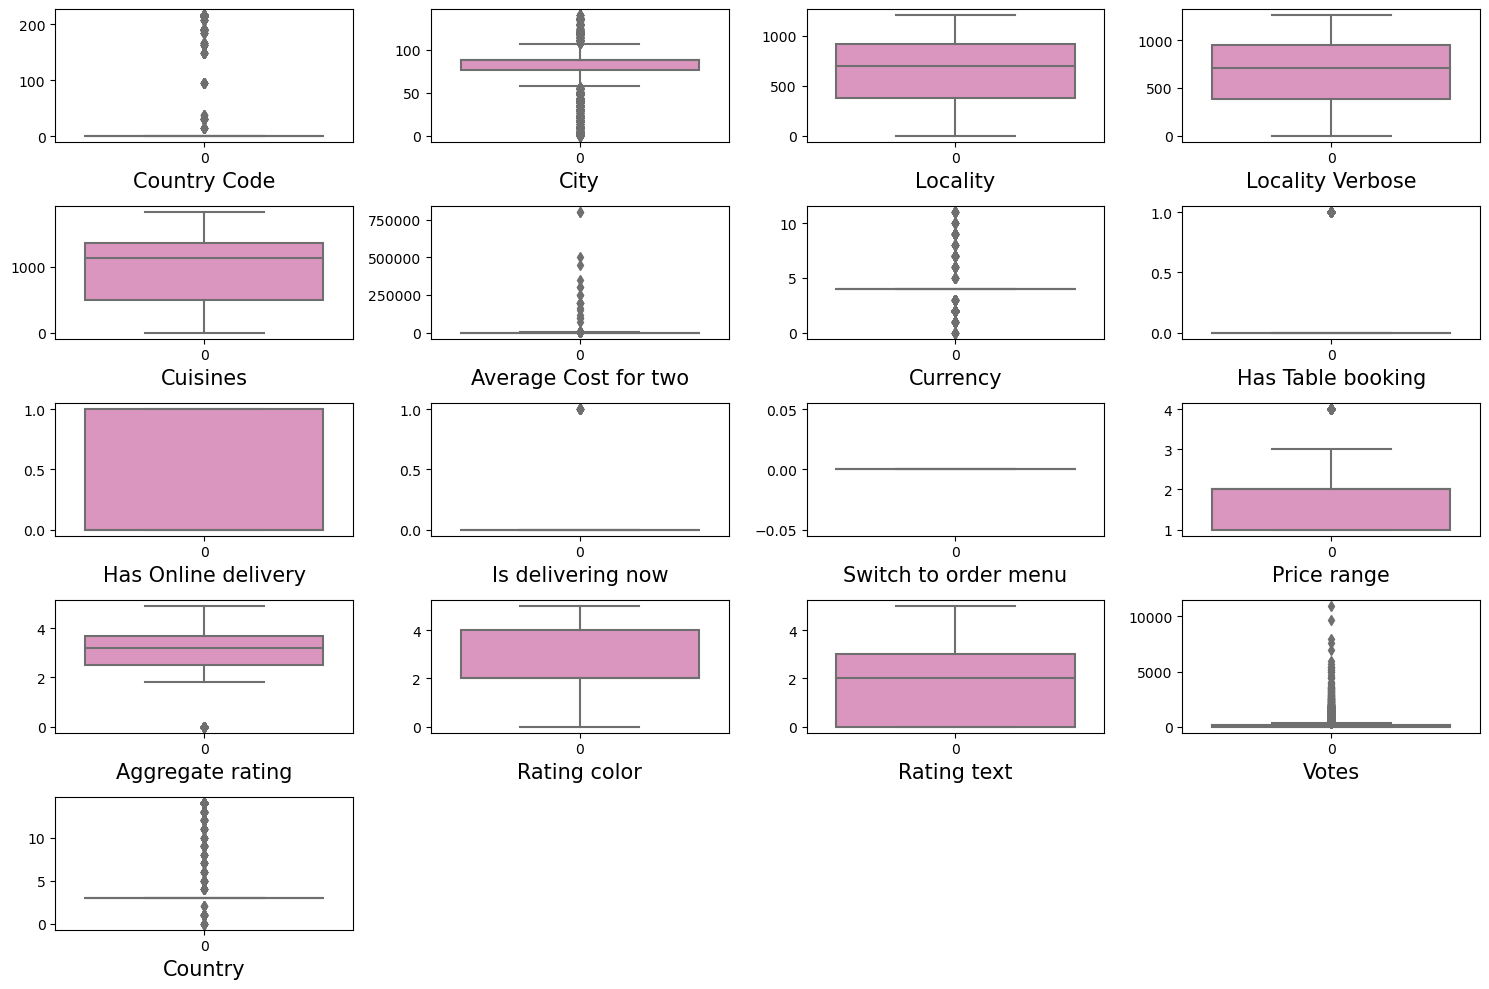

In [61]:
# checking for outliers by plotting boxplot
plt.figure(figsize = (15,10),facecolor ='white')
plotnumber = 1
for col in combined_df:
    if plotnumber<=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(combined_df[col],palette = "Set2_r")
        plt.xlabel(col,fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

Most columns have outliers so we will try to remove using zscore method

In [62]:
# Remove outliers using the zscore method
from scipy.stats import zscore
z_scores = np.abs(zscore(combined_df))
z_scores


,Country Code,City,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,2.531111,0.228533,1.542278,1.523333,NaN,0.006154,4.351046,2.692181,0.587547,0.059771,NaN,1.319803,1.407131,1.977859,0.465442,0.365202,0.853457
1,2.531111,0.228533,0.206201,0.230035,NaN,0.000049,4.351046,2.692181,0.587547,0.059771,NaN,1.319803,1.209281,1.977859,0.465442,1.009168,0.853457
2,2.531111,0.142317,1.108528,1.095249,NaN,0.173743,4.351046,2.692181,0.587547,0.059771,NaN,2.424090,1.143331,1.308053,1.895070,0.262911,0.853457
3,2.531111,0.142317,0.645470,0.595987,NaN,0.018659,4.351046,0.371446,0.587547,0.059771,NaN,2.424090,1.473081,1.977859,0.465442,0.483766,0.853457
4,2.531111,0.142317,0.645470,0.595987,NaN,0.018659,4.351046,2.692181,0.587547,0.059771,NaN,2.424090,1.407131,1.977859,0.465442,0.167595,0.853457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,3.341718,2.659685,0.446821,0.465180,NaN,0.069428,7.681415,0.371446,0.587547,0.059771,NaN,1.319803,0.945480,1.308053,1.895070,1.467151,2.738952
9547,3.341718,2.659685,0.336009,0.359666,NaN,0.067878,7.681415,0.371446,0.587547,0.059771,NaN,1.319803,1.011430,1.308053,1.895070,2.039049,2.738952
9548,3.341718,2.659685,0.329677,0.350622,NaN,0.063845,7.681415,0.371446,0.587547,0.059771,NaN,2.424090,0.681680,1.371170,0.124686,1.171903,2.738952
9549,3.341718,2.659685,0.329677,0.350622,NaN,0.066947,7.681415,0.371446,0.587547,0.059771,NaN,2.424090,0.879530,1.308053,1.895070,1.729853,2.738952


In [63]:
# Set the threshold for what constitutes an outlier
threshold = 3

# Identify rows where any value in the row exceeds the threshold
outliers = (z_scores > threshold).any(axis=1)

# Filter the DataFrame to remove outliers
df = combined_df[~outliers]

# Display the cleaned DataFrame
df

,Country Code,City,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
143,14,12.0,93.0,94.0,1270.0,20,2.0,0.0,0.0,0.0,0.0,2,3.2,2.0,0.0,21,0.0
144,14,15.0,111.0,112.0,1619.0,20,2.0,0.0,0.0,0.0,0.0,2,4.6,0.0,1.0,237,0.0
185,37,25.0,181.0,182.0,1126.0,25,2.0,0.0,0.0,0.0,0.0,2,3.7,5.0,2.0,176,2.0
208,37,32.0,218.0,224.0,508.0,25,2.0,0.0,0.0,0.0,0.0,2,3.0,2.0,0.0,6,2.0
269,14,37.0,282.0,288.0,620.0,7,2.0,0.0,0.0,0.0,0.0,1,3.6,5.0,2.0,29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,148,137.0,1048.0,1101.0,331.0,40,6.0,0.0,0.0,0.0,0.0,2,4.3,1.0,5.0,157,5.0
9333,148,137.0,1048.0,1101.0,1195.0,80,6.0,0.0,0.0,0.0,0.0,4,4.2,1.0,5.0,146,5.0
9334,148,137.0,1177.0,1234.0,1113.0,70,6.0,0.0,0.0,0.0,0.0,4,3.7,5.0,2.0,131,5.0
9335,148,137.0,1177.0,1234.0,791.0,110,6.0,0.0,0.0,0.0,0.0,4,4.3,1.0,5.0,141,5.0


In [64]:
#checking for skewness
df.skew()


Country Code            11.875220
City                    -1.319009
Locality                -0.315238
Locality Verbose        -0.240418
Cuisines                -0.338870
Average Cost for two     3.707455
Currency                -0.769835
Has Table booking        2.283365
Has Online delivery      1.013529
Is delivering now        0.000000
Switch to order menu     0.000000
Price range              1.045083
Aggregate rating        -0.865841
Rating color             0.094697
Rating text              0.425212
Votes                    3.702993
Country                  7.761916
dtype: float64

In [65]:
#removing skewness using cuberoot method
df['Country Code'] = np.cbrt(df['Country Code'])
df['Average Cost for two'] = np.cbrt(df['Average Cost for two'])
df['Has Table booking'] = np.cbrt(df['Has Table booking'])
df['Votes'] = np.cbrt(df['Votes'])
df['Country'] = np.cbrt(df['Country'])

In [70]:
#checking for skewness again
df.skew()

Country Code            10.636271
City                    -1.319009
Locality                -0.315238
Locality Verbose        -0.240418
Cuisines                -0.338870
Average Cost for two     0.996981
Currency                -0.769835
Has Table booking        2.283365
Has Online delivery      1.013529
Is delivering now        0.000000
Switch to order menu     0.000000
Price range              1.045083
Aggregate rating        -0.865841
Rating color             0.094697
Rating text              0.425212
Votes                    0.766598
Country                -18.589242
dtype: float64

In [71]:
#Checking Correlation between the target and independent variables
cor = df.corr()
cor

,Country Code,City,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Country Code,1.000000,0.028321,0.005737,0.006764,-0.057571,-0.179995,0.073870,-0.036755,-0.060043,NaN,NaN,0.163272,0.094690,-0.079577,0.069459,0.070720,-0.143657
City,0.028321,1.000000,-0.027303,-0.029464,0.028289,-0.080381,-0.052966,-0.016924,-0.024986,NaN,NaN,-0.074609,-0.072834,0.067432,-0.037765,-0.081365,0.036480
Locality,0.005737,-0.027303,1.000000,0.999422,-0.012193,-0.078770,0.036836,-0.073597,-0.049330,NaN,NaN,-0.092315,-0.147165,0.000162,0.002312,-0.179194,0.016097
Locality Verbose,0.006764,-0.029464,0.999422,1.000000,-0.013130,-0.077084,0.037567,-0.072884,-0.049660,NaN,NaN,-0.090159,-0.146545,0.000528,0.003633,-0.177565,0.016365
Cuisines,-0.057571,0.028289,-0.012193,-0.013130,1.000000,0.010715,0.012903,0.045162,-0.039339,NaN,NaN,0.010805,-0.056453,-0.045883,-0.064130,-0.038434,0.030511
Average Cost for two,-0.179995,-0.080381,-0.078770,-0.077084,0.010715,1.000000,0.023042,0.617757,0.173423,NaN,NaN,0.845157,0.375532,-0.045264,0.048683,0.494475,0.111148
Currency,0.073870,-0.052966,0.036836,0.037567,0.012903,0.023042,1.000000,0.003066,0.005009,NaN,NaN,0.008158,0.013767,-0.073618,0.046589,0.040227,0.514415
Has Table booking,-0.036755,-0.016924,-0.073597,-0.072884,0.045162,0.617757,0.003066,1.000000,0.084547,NaN,NaN,0.574921,0.215770,-0.012646,0.046696,0.335220,0.015666
Has Online delivery,-0.060043,-0.024986,-0.049330,-0.049660,-0.039339,0.173423,0.005009,0.084547,1.000000,NaN,NaN,0.129612,0.292592,-0.017987,-0.059068,0.342940,0.025592
Is delivering now,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


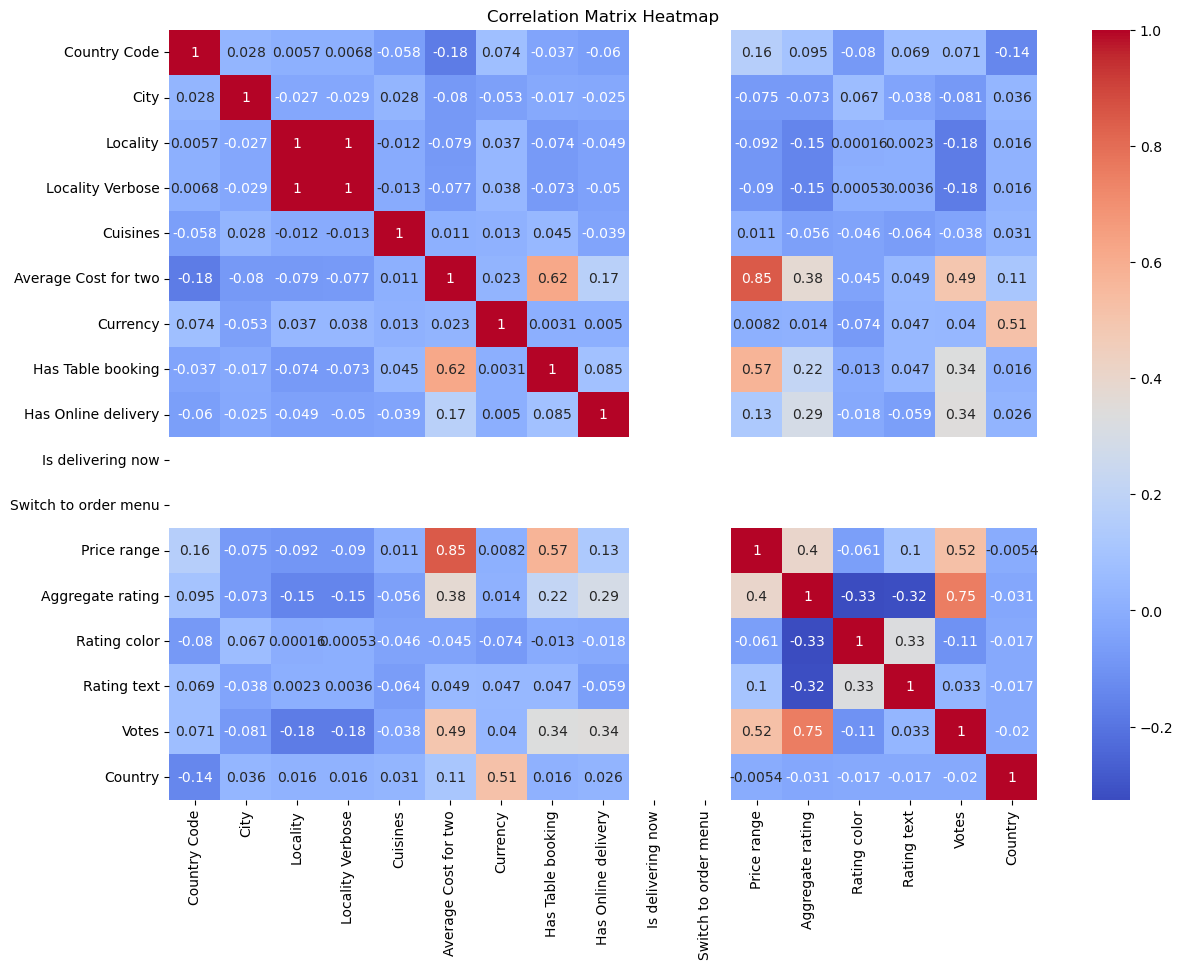

In [72]:
# Visualize the correlation matrix between the dependent and independent variables using a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


Model Building Using machine learning algorithms

Predicting the Average Cost for two(Cost for two people in different currencies) Regression Problem

In [73]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
# Split the dataset into features and target variable
X = df.drop('Average Cost for two', axis=1)
y = df['Average Cost for two']

In [75]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
#Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "k-NN": KNeighborsRegressor()
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse}, R2: {r2}")

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

Linear Regression - MSE: 0.7228300199188707, R2: 0.8273378689529639
Ridge Regression - MSE: 0.7227487047780208, R2: 0.8273572926696312
Lasso Regression - MSE: 2.1823265963296388, R2: 0.47870847864731403
Decision Tree - MSE: 0.8575148580502419, R2: 0.7951657530603536
Random Forest - MSE: 0.5354542626442202, R2: 0.8720962445960017
Gradient Boosting - MSE: 0.5158518227796601, R2: 0.8767786719267263
SVR - MSE: 0.6784517004969157, R2: 0.8379385011798058
k-NN - MSE: 0.8650327374461438, R2: 0.7933699600776595
                        MSE        R2
Linear Regression  0.722830  0.827338
Ridge Regression   0.722749  0.827357
Lasso Regression   2.182327  0.478708
Decision Tree      0.857515  0.795166
Random Forest      0.535454  0.872096
Gradient Boosting  0.515852  0.876779
SVR                0.678452  0.837939
k-NN               0.865033  0.793370


Conclusion Best Model: Gradient Boosting Regressor Model with MSE: 0.515852 R²: 0.876779. Gradient Boosting model has the lowest MSE and the highest R², making it the best performing model among the ones tested.

Hyperparemeter tuning on the best model - Gradient boosting Regressor model

In [79]:
# Define the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Best Parameters: {best_params}")
print(f"Root Mean Squared Error: {rmse}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Root Mean Squared Error: 0.6801051986711202


2) Predicting the Price Range is a Classification Problem because the target variable - price_range has values like 1, 2, 3, 4 and we are predicting which discrete category the price falls into.

In [80]:
#importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error,roc_auc_score

In [81]:
# Split the dataset into features and target variable
X = df.drop('Price range', axis=1)
y = df['Price range']

In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9581120943952802
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       819
           2       0.94      0.96      0.95       595
           3       0.92      0.83      0.87       207
           4       0.94      0.89      0.92        74

    accuracy                           0.96      1695
   macro avg       0.95      0.92      0.93      1695
weighted avg       0.96      0.96      0.96      1695



In [85]:
# Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9787610619469026
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       819
           2       0.98      0.98      0.98       595
           3       0.97      0.93      0.95       207
           4       0.88      0.96      0.92        74

    accuracy                           0.98      1695
   macro avg       0.95      0.96      0.96      1695
weighted avg       0.98      0.98      0.98      1695



In [86]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9699115044247788
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       819
           2       0.96      0.97      0.97       595
           3       0.94      0.90      0.92       207
           4       0.98      0.88      0.93        74

    accuracy                           0.97      1695
   macro avg       0.97      0.94      0.95      1695
weighted avg       0.97      0.97      0.97      1695



In [87]:
# Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9781710914454277
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       819
           2       0.97      0.97      0.97       595
           3       0.95      0.94      0.94       207
           4       0.99      0.92      0.95        74

    accuracy                           0.98      1695
   macro avg       0.97      0.96      0.96      1695
weighted avg       0.98      0.98      0.98      1695



In [88]:
from sklearn.svm import SVC

# Train SVM model
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine
Accuracy: 0.9392330383480826
              precision    recall  f1-score   support

           1       0.98      0.97      0.98       819
           2       0.90      0.97      0.94       595
           3       0.87      0.80      0.83       207
           4       0.93      0.74      0.83        74

    accuracy                           0.94      1695
   macro avg       0.92      0.87      0.89      1695
weighted avg       0.94      0.94      0.94      1695



In [89]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network model
mlp_clf = MLPClassifier(max_iter=1000)
mlp_clf.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_clf.predict(X_test)

# Evaluate the model
print("Neural Network")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

Neural Network
Accuracy: 0.9663716814159292
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       819
           2       0.96      0.97      0.97       595
           3       0.91      0.88      0.90       207
           4       0.93      0.84      0.88        74

    accuracy                           0.97      1695
   macro avg       0.95      0.92      0.93      1695
weighted avg       0.97      0.97      0.97      1695



The best model is DecisionTreeClassifier because it has the highest accuracy score: 0.9787610619469026

In [90]:
#Hyperparameter tuning on the best model Decision Tree Classifier
# Define the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and the grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV with the classifier, parameter grid, and scoring method
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Best Hyperparameters:", best_params)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy on Test Set: 0.9781710914454277

Classification Report:
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       819
           2       0.98      0.98      0.98       595
           3       0.95      0.93      0.94       207
           4       0.91      0.93      0.92        74

    accuracy                           0.98      1695
   macro avg       0.96      0.96      0.96      1695
weighted avg       0.98      0.98      0.98      1695

